# Wine 데이터 셋으로 PCA 적용하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

- PCA 변환

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [5]:
wine_pca = pca.fit_transform(wine_std)
wine_pca_df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
wine_pca_df['target'] = wine.target
wine_pca_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


In [6]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

### 시각화

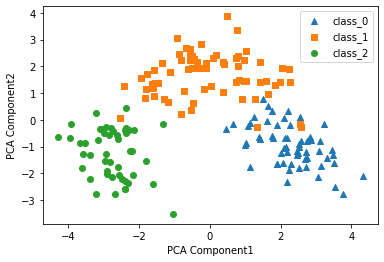

In [7]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = wine_pca_df[wine_pca_df.target == i]['PC1']
    y_axis_data = wine_pca_df[wine_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.show()